In [33]:
import pandas as pd
import numpy as np
import pickle
from sklearn import datasets # sklearn comes with some toy datasets to practise
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn.datasets import make_classification # download a dataset 
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from scipy.spatial import distance_matrix
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [14]:
hot100songsfeatures=pd.read_csv('data/hot100songsfeatures.csv')
hot100songsfeatures.head()
pd.set_option('display.max_columns', None)
hot100songsfeatures.head()

,Unnamed: 0,artist_name,song_title,songs_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0,Harry Styles,As It Was,4LRPiXqCikLlN15c3yImP7,0.449,0.023,8,-24.423,1,0.0336,0.9030,0.018700,0.1160,0.277,90.071,audio_features,7eg3WCVdauMpnUbfaZYfvQ,spotify:track:7eg3WCVdauMpnUbfaZYfvQ,https://api.spotify.com/v1/tracks/7eg3WCVdauMp...,https://api.spotify.com/v1/audio-analysis/7eg3...,171667,4
1,1,Jack Harlow,First Class,1rDQ4oMwGJI7B4tovsBOxc,0.215,0.710,9,-7.285,1,0.0459,0.0143,0.000020,0.3280,0.415,160.313,audio_features,0V4pyMCQ26KcrZoeZqoDtj,spotify:track:0V4pyMCQ26KcrZoeZqoDtj,https://api.spotify.com/v1/tracks/0V4pyMCQ26Kc...,https://api.spotify.com/v1/audio-analysis/0V4p...,337709,4
2,2,Lizzo,About Damn Time,1PckUlxKqWQs3RlWXVBLw3,0.709,0.357,5,-9.289,1,0.2140,0.4780,0.000294,0.1120,0.544,75.494,audio_features,4XJRpBOG0bU3Nxnvam3FnC,spotify:track:4XJRpBOG0bU3Nxnvam3FnC,https://api.spotify.com/v1/tracks/4XJRpBOG0bU3...,https://api.spotify.com/v1/audio-analysis/4XJR...,129480,4
3,3,Glass Animals,Heat Waves,3USxtqRwSYz57Ewm6wWRMp,0.797,0.616,1,-10.229,0,0.3750,0.7620,0.000293,0.0979,0.451,103.071,audio_features,44XjoNvtwevktFKjvVe1vH,spotify:track:44XjoNvtwevktFKjvVe1vH,https://api.spotify.com/v1/tracks/44XjoNvtwevk...,https://api.spotify.com/v1/audio-analysis/44Xj...,339612,4
4,4,Latto,Big Energy,6Zu3aw7FfjAF9WA0fA81Oq,0.708,0.673,6,-4.163,1,0.0585,0.4990,0.000233,0.1030,0.311,136.969,audio_features,1bdm32mVmoGcek5bVKxQKd,spotify:track:1bdm32mVmoGcek5bVKxQKd,https://api.spotify.com/v1/tracks/1bdm32mVmoGc...,https://api.spotify.com/v1/audio-analysis/1bdm...,197520,4


In [15]:
#hot100songsfeatures.info()

1 - add column to identified the list

In [16]:
hot100songsfeatures['identifier']="hot100"
hot100songsfeatures['identifier']
hot100songsfeatures.head()

,Unnamed: 0,artist_name,song_title,songs_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,identifier
0,0,Harry Styles,As It Was,4LRPiXqCikLlN15c3yImP7,0.449,0.023,8,-24.423,1,0.0336,0.9030,0.018700,0.1160,0.277,90.071,audio_features,7eg3WCVdauMpnUbfaZYfvQ,spotify:track:7eg3WCVdauMpnUbfaZYfvQ,https://api.spotify.com/v1/tracks/7eg3WCVdauMp...,https://api.spotify.com/v1/audio-analysis/7eg3...,171667,4,hot100
1,1,Jack Harlow,First Class,1rDQ4oMwGJI7B4tovsBOxc,0.215,0.710,9,-7.285,1,0.0459,0.0143,0.000020,0.3280,0.415,160.313,audio_features,0V4pyMCQ26KcrZoeZqoDtj,spotify:track:0V4pyMCQ26KcrZoeZqoDtj,https://api.spotify.com/v1/tracks/0V4pyMCQ26Kc...,https://api.spotify.com/v1/audio-analysis/0V4p...,337709,4,hot100
2,2,Lizzo,About Damn Time,1PckUlxKqWQs3RlWXVBLw3,0.709,0.357,5,-9.289,1,0.2140,0.4780,0.000294,0.1120,0.544,75.494,audio_features,4XJRpBOG0bU3Nxnvam3FnC,spotify:track:4XJRpBOG0bU3Nxnvam3FnC,https://api.spotify.com/v1/tracks/4XJRpBOG0bU3...,https://api.spotify.com/v1/audio-analysis/4XJR...,129480,4,hot100
3,3,Glass Animals,Heat Waves,3USxtqRwSYz57Ewm6wWRMp,0.797,0.616,1,-10.229,0,0.3750,0.7620,0.000293,0.0979,0.451,103.071,audio_features,44XjoNvtwevktFKjvVe1vH,spotify:track:44XjoNvtwevktFKjvVe1vH,https://api.spotify.com/v1/tracks/44XjoNvtwevk...,https://api.spotify.com/v1/audio-analysis/44Xj...,339612,4,hot100
4,4,Latto,Big Energy,6Zu3aw7FfjAF9WA0fA81Oq,0.708,0.673,6,-4.163,1,0.0585,0.4990,0.000233,0.1030,0.311,136.969,audio_features,1bdm32mVmoGcek5bVKxQKd,spotify:track:1bdm32mVmoGcek5bVKxQKd,https://api.spotify.com/v1/tracks/1bdm32mVmoGc...,https://api.spotify.com/v1/audio-analysis/1bdm...,197520,4,hot100


In [17]:
not_so_hot_songsfeatures=pd.read_csv('data/not_so_hot_songsfeatures.csv')
not_so_hot_songsfeatures.head()

,Unnamed: 0,artist_name,song_title,songs_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0,Crywank,Only Everyone Can Judge Me,0zgTmQKlcGxZxHo3ObjnQx,0.721,0.460,10,-11.885,0,0.2830,0.087200,0.000379,0.0959,0.576,89.979,audio_features,0IHBwwlqEOtj4qukhAoMTC,spotify:track:0IHBwwlqEOtj4qukhAoMTC,https://api.spotify.com/v1/tracks/0IHBwwlqEOtj...,https://api.spotify.com/v1/audio-analysis/0IHB...,170361,4
1,1,Jazmine Sullivan,In Love With Another Man,1xu91y5jf13yxAssdfsbPt,0.395,0.123,10,-16.099,0,0.0329,0.958000,0.952000,0.1240,0.156,73.959,audio_features,3KJeOdlwj5W0c9XIrjqzY0,spotify:track:3KJeOdlwj5W0c9XIrjqzY0,https://api.spotify.com/v1/tracks/3KJeOdlwj5W0...,https://api.spotify.com/v1/audio-analysis/3KJe...,387667,4
2,2,Rival Sons,Back In The Woods,4r9ZPOyVV5abeHjOsuFsaW,0.361,0.977,1,-5.452,0,0.1080,0.000104,0.249000,0.3190,0.269,114.944,audio_features,5C5LhGFGrHmdHjDtvdjTYa,spotify:track:5C5LhGFGrHmdHjDtvdjTYa,https://api.spotify.com/v1/tracks/5C5LhGFGrHmd...,https://api.spotify.com/v1/audio-analysis/5C5L...,167286,4
3,3,TRESOR,Aphrodite,60q1qCrbsMcz1Dj0mBTjhH,0.811,0.324,0,-14.555,1,0.1230,0.003540,0.002000,0.0544,0.886,142.422,audio_features,4EgVhvG6zB6uSckhHKprBM,spotify:track:4EgVhvG6zB6uSckhHKprBM,https://api.spotify.com/v1/tracks/4EgVhvG6zB6u...,https://api.spotify.com/v1/audio-analysis/4EgV...,216120,4
4,4,Planetshakers,Like A Fire,5HOgqiUikXWGzHDw2tbGRR,0.573,0.759,0,-4.646,1,0.0271,0.005750,0.000000,0.1200,0.234,107.977,audio_features,0lDg8siIkafxYPlf0um4HV,spotify:track:0lDg8siIkafxYPlf0um4HV,https://api.spotify.com/v1/tracks/0lDg8siIkafx...,https://api.spotify.com/v1/audio-analysis/0lDg...,236293,4


In [18]:
not_so_hot_songsfeatures['identifier']="not_hot"
not_so_hot_songsfeatures['identifier']
not_so_hot_songsfeatures.head()

,Unnamed: 0,artist_name,song_title,songs_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,identifier
0,0,Crywank,Only Everyone Can Judge Me,0zgTmQKlcGxZxHo3ObjnQx,0.721,0.460,10,-11.885,0,0.2830,0.087200,0.000379,0.0959,0.576,89.979,audio_features,0IHBwwlqEOtj4qukhAoMTC,spotify:track:0IHBwwlqEOtj4qukhAoMTC,https://api.spotify.com/v1/tracks/0IHBwwlqEOtj...,https://api.spotify.com/v1/audio-analysis/0IHB...,170361,4,not_hot
1,1,Jazmine Sullivan,In Love With Another Man,1xu91y5jf13yxAssdfsbPt,0.395,0.123,10,-16.099,0,0.0329,0.958000,0.952000,0.1240,0.156,73.959,audio_features,3KJeOdlwj5W0c9XIrjqzY0,spotify:track:3KJeOdlwj5W0c9XIrjqzY0,https://api.spotify.com/v1/tracks/3KJeOdlwj5W0...,https://api.spotify.com/v1/audio-analysis/3KJe...,387667,4,not_hot
2,2,Rival Sons,Back In The Woods,4r9ZPOyVV5abeHjOsuFsaW,0.361,0.977,1,-5.452,0,0.1080,0.000104,0.249000,0.3190,0.269,114.944,audio_features,5C5LhGFGrHmdHjDtvdjTYa,spotify:track:5C5LhGFGrHmdHjDtvdjTYa,https://api.spotify.com/v1/tracks/5C5LhGFGrHmd...,https://api.spotify.com/v1/audio-analysis/5C5L...,167286,4,not_hot
3,3,TRESOR,Aphrodite,60q1qCrbsMcz1Dj0mBTjhH,0.811,0.324,0,-14.555,1,0.1230,0.003540,0.002000,0.0544,0.886,142.422,audio_features,4EgVhvG6zB6uSckhHKprBM,spotify:track:4EgVhvG6zB6uSckhHKprBM,https://api.spotify.com/v1/tracks/4EgVhvG6zB6u...,https://api.spotify.com/v1/audio-analysis/4EgV...,216120,4,not_hot
4,4,Planetshakers,Like A Fire,5HOgqiUikXWGzHDw2tbGRR,0.573,0.759,0,-4.646,1,0.0271,0.005750,0.000000,0.1200,0.234,107.977,audio_features,0lDg8siIkafxYPlf0um4HV,spotify:track:0lDg8siIkafxYPlf0um4HV,https://api.spotify.com/v1/tracks/0lDg8siIkafx...,https://api.spotify.com/v1/audio-analysis/0lDg...,236293,4,not_hot


2 - concatenate the hot and non hot 

In [25]:
full_songs=pd.concat([hot100songsfeatures, not_so_hot_songsfeatures],axis=0)
full_songs
#full_songs.shape

,Unnamed: 0,artist_name,song_title,songs_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,identifier
0,0,Harry Styles,As It Was,4LRPiXqCikLlN15c3yImP7,0.449,0.023,8,-24.423,1,0.0336,0.903000,0.018700,0.1160,0.277,90.071,audio_features,7eg3WCVdauMpnUbfaZYfvQ,spotify:track:7eg3WCVdauMpnUbfaZYfvQ,https://api.spotify.com/v1/tracks/7eg3WCVdauMp...,https://api.spotify.com/v1/audio-analysis/7eg3...,171667,4,hot100
1,1,Jack Harlow,First Class,1rDQ4oMwGJI7B4tovsBOxc,0.215,0.710,9,-7.285,1,0.0459,0.014300,0.000020,0.3280,0.415,160.313,audio_features,0V4pyMCQ26KcrZoeZqoDtj,spotify:track:0V4pyMCQ26KcrZoeZqoDtj,https://api.spotify.com/v1/tracks/0V4pyMCQ26Kc...,https://api.spotify.com/v1/audio-analysis/0V4p...,337709,4,hot100
2,2,Lizzo,About Damn Time,1PckUlxKqWQs3RlWXVBLw3,0.709,0.357,5,-9.289,1,0.2140,0.478000,0.000294,0.1120,0.544,75.494,audio_features,4XJRpBOG0bU3Nxnvam3FnC,spotify:track:4XJRpBOG0bU3Nxnvam3FnC,https://api.spotify.com/v1/tracks/4XJRpBOG0bU3...,https://api.spotify.com/v1/audio-analysis/4XJR...,129480,4,hot100
3,3,Glass Animals,Heat Waves,3USxtqRwSYz57Ewm6wWRMp,0.797,0.616,1,-10.229,0,0.3750,0.762000,0.000293,0.0979,0.451,103.071,audio_features,44XjoNvtwevktFKjvVe1vH,spotify:track:44XjoNvtwevktFKjvVe1vH,https://api.spotify.com/v1/tracks/44XjoNvtwevk...,https://api.spotify.com/v1/audio-analysis/44Xj...,339612,4,hot100
4,4,Latto,Big Energy,6Zu3aw7FfjAF9WA0fA81Oq,0.708,0.673,6,-4.163,1,0.0585,0.499000,0.000233,0.1030,0.311,136.969,audio_features,1bdm32mVmoGcek5bVKxQKd,spotify:track:1bdm32mVmoGcek5bVKxQKd,https://api.spotify.com/v1/tracks/1bdm32mVmoGc...,https://api.spotify.com/v1/audio-analysis/1bdm...,197520,4,hot100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3614,3614,Rascal Flatts,Feels Like The First Time,0lDg8siIkafxYPlf0um4HV,0.403,0.673,1,-5.116,0,0.0325,0.076500,0.000000,0.2440,0.231,77.981,audio_features,5HOgqiUikXWGzHDw2tbGRR,spotify:track:5HOgqiUikXWGzHDw2tbGRR,https://api.spotify.com/v1/tracks/5HOgqiUikXWG...,https://api.spotify.com/v1/audio-analysis/5HOg...,267707,4,not_hot
3615,3615,Mighty Diamonds,Pass The Koutchie,4EgVhvG6zB6uSckhHKprBM,0.646,0.615,9,-12.868,1,0.0913,0.785000,0.002340,0.2690,0.664,95.988,audio_features,60q1qCrbsMcz1Dj0mBTjhH,spotify:track:60q1qCrbsMcz1Dj0mBTjhH,https://api.spotify.com/v1/tracks/60q1qCrbsMcz...,https://api.spotify.com/v1/audio-analysis/60q1...,234747,4,not_hot
3616,3616,Attila,Villain,5C5LhGFGrHmdHjDtvdjTYa,0.318,0.879,2,-2.625,1,0.0574,0.000298,0.030100,0.1450,0.443,151.481,audio_features,4r9ZPOyVV5abeHjOsuFsaW,spotify:track:4r9ZPOyVV5abeHjOsuFsaW,https://api.spotify.com/v1/tracks/4r9ZPOyVV5ab...,https://api.spotify.com/v1/audio-analysis/4r9Z...,212947,4,not_hot
3617,3617,Bohren & Der Club Of Gore,Constant Fear,3KJeOdlwj5W0c9XIrjqzY0,0.445,0.340,0,-7.942,0,0.0518,0.698000,0.000000,0.1380,0.177,116.826,audio_features,1xu91y5jf13yxAssdfsbPt,spotify:track:1xu91y5jf13yxAssdfsbPt,https://api.spotify.com/v1/tracks/1xu91y5jf13y...,https://api.spotify.com/v1/audio-analysis/1xu9...,250093,3,not_hot


In [24]:
#reset the index
full_songs.reset_index(drop=True, inplace=True)
full_songs

,Unnamed: 0,artist_name,song_title,songs_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,identifier
0,0,Harry Styles,As It Was,4LRPiXqCikLlN15c3yImP7,0.449,0.023,8,-24.423,1,0.0336,0.903000,0.018700,0.1160,0.277,90.071,audio_features,7eg3WCVdauMpnUbfaZYfvQ,spotify:track:7eg3WCVdauMpnUbfaZYfvQ,https://api.spotify.com/v1/tracks/7eg3WCVdauMp...,https://api.spotify.com/v1/audio-analysis/7eg3...,171667,4,hot100
1,1,Jack Harlow,First Class,1rDQ4oMwGJI7B4tovsBOxc,0.215,0.710,9,-7.285,1,0.0459,0.014300,0.000020,0.3280,0.415,160.313,audio_features,0V4pyMCQ26KcrZoeZqoDtj,spotify:track:0V4pyMCQ26KcrZoeZqoDtj,https://api.spotify.com/v1/tracks/0V4pyMCQ26Kc...,https://api.spotify.com/v1/audio-analysis/0V4p...,337709,4,hot100
2,2,Lizzo,About Damn Time,1PckUlxKqWQs3RlWXVBLw3,0.709,0.357,5,-9.289,1,0.2140,0.478000,0.000294,0.1120,0.544,75.494,audio_features,4XJRpBOG0bU3Nxnvam3FnC,spotify:track:4XJRpBOG0bU3Nxnvam3FnC,https://api.spotify.com/v1/tracks/4XJRpBOG0bU3...,https://api.spotify.com/v1/audio-analysis/4XJR...,129480,4,hot100
3,3,Glass Animals,Heat Waves,3USxtqRwSYz57Ewm6wWRMp,0.797,0.616,1,-10.229,0,0.3750,0.762000,0.000293,0.0979,0.451,103.071,audio_features,44XjoNvtwevktFKjvVe1vH,spotify:track:44XjoNvtwevktFKjvVe1vH,https://api.spotify.com/v1/tracks/44XjoNvtwevk...,https://api.spotify.com/v1/audio-analysis/44Xj...,339612,4,hot100
4,4,Latto,Big Energy,6Zu3aw7FfjAF9WA0fA81Oq,0.708,0.673,6,-4.163,1,0.0585,0.499000,0.000233,0.1030,0.311,136.969,audio_features,1bdm32mVmoGcek5bVKxQKd,spotify:track:1bdm32mVmoGcek5bVKxQKd,https://api.spotify.com/v1/tracks/1bdm32mVmoGc...,https://api.spotify.com/v1/audio-analysis/1bdm...,197520,4,hot100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3686,3614,Rascal Flatts,Feels Like The First Time,0lDg8siIkafxYPlf0um4HV,0.403,0.673,1,-5.116,0,0.0325,0.076500,0.000000,0.2440,0.231,77.981,audio_features,5HOgqiUikXWGzHDw2tbGRR,spotify:track:5HOgqiUikXWGzHDw2tbGRR,https://api.spotify.com/v1/tracks/5HOgqiUikXWG...,https://api.spotify.com/v1/audio-analysis/5HOg...,267707,4,not_hot
3687,3615,Mighty Diamonds,Pass The Koutchie,4EgVhvG6zB6uSckhHKprBM,0.646,0.615,9,-12.868,1,0.0913,0.785000,0.002340,0.2690,0.664,95.988,audio_features,60q1qCrbsMcz1Dj0mBTjhH,spotify:track:60q1qCrbsMcz1Dj0mBTjhH,https://api.spotify.com/v1/tracks/60q1qCrbsMcz...,https://api.spotify.com/v1/audio-analysis/60q1...,234747,4,not_hot
3688,3616,Attila,Villain,5C5LhGFGrHmdHjDtvdjTYa,0.318,0.879,2,-2.625,1,0.0574,0.000298,0.030100,0.1450,0.443,151.481,audio_features,4r9ZPOyVV5abeHjOsuFsaW,spotify:track:4r9ZPOyVV5abeHjOsuFsaW,https://api.spotify.com/v1/tracks/4r9ZPOyVV5ab...,https://api.spotify.com/v1/audio-analysis/4r9Z...,212947,4,not_hot
3689,3617,Bohren & Der Club Of Gore,Constant Fear,3KJeOdlwj5W0c9XIrjqzY0,0.445,0.340,0,-7.942,0,0.0518,0.698000,0.000000,0.1380,0.177,116.826,audio_features,1xu91y5jf13yxAssdfsbPt,spotify:track:1xu91y5jf13yxAssdfsbPt,https://api.spotify.com/v1/tracks/1xu91y5jf13y...,https://api.spotify.com/v1/audio-analysis/1xu9...,250093,3,not_hot


2 - drop numerical columns that we don´t need from the full_song df

In [26]:
full_songs.columns

Index(['Unnamed: 0', 'artist_name', 'song_title', 'songs_id', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'type', 'id', 'uri',
       'track_href', 'analysis_url', 'duration_ms', 'time_signature',
       'identifier'],
      dtype='object')

In [28]:
full_songs_1=full_songs.drop(['Unnamed: 0', 'songs_id','type', 'id', 'uri', 'track_href','analysis_url','time_signature'], axis =1)
full_songs_1.head()
full_songs_1.columns

Index(['artist_name', 'song_title', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_ms', 'identifier'],
      dtype='object')

3 - separate numerical and categorical

In [31]:
full_songs_1_num = full_songs_1.select_dtypes(include=np.number)
full_songs_1_num.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.449,0.023,8,-24.423,1,0.0336,0.9030,0.018700,0.1160,0.277,90.071,171667
1,0.215,0.710,9,-7.285,1,0.0459,0.0143,0.000020,0.3280,0.415,160.313,337709
2,0.709,0.357,5,-9.289,1,0.2140,0.4780,0.000294,0.1120,0.544,75.494,129480
3,0.797,0.616,1,-10.229,0,0.3750,0.7620,0.000293,0.0979,0.451,103.071,339612
4,0.708,0.673,6,-4.163,1,0.0585,0.4990,0.000233,0.1030,0.311,136.969,197520


In [32]:
full_songs_1_cat = full_songs_1.select_dtypes(exclude=np.number)
full_songs_1_cat.head()

,artist_name,song_title,identifier
0,Harry Styles,As It Was,hot100
1,Jack Harlow,First Class,hot100
2,Lizzo,About Damn Time,hot100
3,Glass Animals,Heat Waves,hot100
4,Latto,Big Energy,hot100


In [34]:
X = full_songs_1_num.copy()
X

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.449,0.023,8,-24.423,1,0.0336,0.903000,0.018700,0.1160,0.277,90.071,171667
1,0.215,0.710,9,-7.285,1,0.0459,0.014300,0.000020,0.3280,0.415,160.313,337709
2,0.709,0.357,5,-9.289,1,0.2140,0.478000,0.000294,0.1120,0.544,75.494,129480
3,0.797,0.616,1,-10.229,0,0.3750,0.762000,0.000293,0.0979,0.451,103.071,339612
4,0.708,0.673,6,-4.163,1,0.0585,0.499000,0.000233,0.1030,0.311,136.969,197520
...,...,...,...,...,...,...,...,...,...,...,...,...
3614,0.403,0.673,1,-5.116,0,0.0325,0.076500,0.000000,0.2440,0.231,77.981,267707
3615,0.646,0.615,9,-12.868,1,0.0913,0.785000,0.002340,0.2690,0.664,95.988,234747
3616,0.318,0.879,2,-2.625,1,0.0574,0.000298,0.030100,0.1450,0.443,151.481,212947
3617,0.445,0.340,0,-7.942,0,0.0518,0.698000,0.000000,0.1380,0.177,116.826,250093


4 - scale the full numerical dataframe

In [35]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X) # I will save this scaler that is trained 
filename = "transformation/scaler.pickle" # Path with filename . 

#organize for the project
#data/
#tranformers/
#models/

with open(filename, "wb") as file: # write things in binary mode "b" in "wb". "W" is writing. With binary I will not ba able to read
        pickle.dump(scaler,file) # with this file name I want to store my scalar into di file 
        #pickle is a function to store things
        
X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns)
display(X.head())
print()
display(X_scaled_df.head())

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.449,0.023,8,-24.423,1,0.0336,0.9030,0.018700,0.1160,0.277,90.071,171667
1,0.215,0.710,9,-7.285,1,0.0459,0.0143,0.000020,0.3280,0.415,160.313,337709
2,0.709,0.357,5,-9.289,1,0.2140,0.4780,0.000294,0.1120,0.544,75.494,129480
3,0.797,0.616,1,-10.229,0,0.3750,0.7620,0.000293,0.0979,0.451,103.071,339612
4,0.708,0.673,6,-4.163,1,0.0585,0.4990,0.000233,0.1030,0.311,136.969,197520


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,-0.665204,-2.377546,0.797326,-2.931524,0.740431,-0.524216,1.877085,-0.405584,-0.463061,-0.696947,-0.941939,-0.787232
1,-1.983610,0.458610,1.075802,0.265966,0.740431,-0.412665,-0.898964,-0.470577,0.805631,-0.145090,1.377402,1.136299
2,0.799691,-0.998687,-0.038101,-0.107927,0.740431,1.111862,0.549504,-0.469622,-0.486998,0.370776,-1.423261,-1.275952
3,1.295502,0.070548,-1.152003,-0.283305,-1.350565,2.571997,1.436640,-0.469626,-0.571378,-0.001127,-0.512688,1.158344
4,0.794057,0.305862,0.240375,0.848447,0.740431,-0.298393,0.615102,-0.469835,-0.540858,-0.560982,0.606600,-0.487735


5 - run the Kmeans model

In [36]:
K = range(2, 21) #range of inertia values

inertia = [] #list of inertia values
silhouette = [] #list of silouette scores if I don´t see differences in inercia

for k in K:
    print("Training a K-Means model with {} neighbours! ".format(k))
    print() #space
    kmeans = KMeans(n_clusters=k, # i train my cluster method 
                    random_state=None,
                    verbose=1) #option that displace prosress as massages about the K-means progress 
    kmeans.fit(X_scaled_df)#train model
    filename = "models/kmeans_" + str(k) + ".pickle" # Path with filename #every time that K changes I will have different file names
    with open(filename, "wb") as file: # save the different kmeans models in the hard drive
        pickle.dump(kmeans,file)
    inertia.append(kmeans.inertia_) # apppend in the list of inertia
    silhouette.append(silhouette_score(X_scaled_df, kmeans.predict(X_scaled_df))) # append to the siluette but I need to apply a function




Training a K-Means model with 2 neighbours! 

Initialization complete
Iteration 0, inertia 88829.2678186046.
Iteration 1, inertia 36102.758969574614.
Iteration 2, inertia 35961.957924769544.
Iteration 3, inertia 35911.167616120736.
Iteration 4, inertia 35882.638571648786.
Iteration 5, inertia 35871.5561976163.
Iteration 6, inertia 35861.348201977824.
Iteration 7, inertia 35858.974192997004.
Iteration 8, inertia 35857.17030343354.
Iteration 9, inertia 35855.813191610185.
Iteration 10, inertia 35855.43381448692.
Iteration 11, inertia 35855.3509667203.
Converged at iteration 11: strict convergence.
Initialization complete
Iteration 0, inertia 57379.344520040395.
Iteration 1, inertia 36298.88626640471.
Iteration 2, inertia 35923.76648582281.
Iteration 3, inertia 35882.07865463282.
Iteration 4, inertia 35870.67604162209.
Iteration 5, inertia 35866.820419188705.
Iteration 6, inertia 35863.27504765423.
Iteration 7, inertia 35861.108620624495.
Iteration 8, inertia 35858.320606555484.
Iteration

Iteration 18, inertia 33004.33130279714.
Iteration 19, inertia 33003.86842372277.
Iteration 20, inertia 33003.56713961586.
Iteration 21, inertia 33003.27073320912.
Iteration 22, inertia 33002.94966530885.
Iteration 23, inertia 33002.71507892959.
Converged at iteration 23: center shift 7.634068773818288e-05 within tolerance 9.999999999999998e-05.
Initialization complete
Iteration 0, inertia 46895.858435594644.
Iteration 1, inertia 34620.454532509844.
Iteration 2, inertia 33674.54619082123.
Iteration 3, inertia 33382.676233169506.
Iteration 4, inertia 33227.82644860605.
Iteration 5, inertia 33143.25947936675.
Iteration 6, inertia 33087.46777253215.
Iteration 7, inertia 33052.985546261334.
Iteration 8, inertia 33031.43364318303.
Iteration 9, inertia 33020.46148906709.
Iteration 10, inertia 33013.955131830386.
Iteration 11, inertia 33009.01220966322.
Iteration 12, inertia 33006.317273492.
Iteration 13, inertia 33004.385819384304.
Iteration 14, inertia 33003.72587510652.
Iteration 15, inert

Iteration 1, inertia 32047.338370585734.
Iteration 2, inertia 31388.780590692455.
Iteration 3, inertia 31158.714144361285.
Iteration 4, inertia 31032.087326515473.
Iteration 5, inertia 30944.924988962874.
Iteration 6, inertia 30868.610290640027.
Iteration 7, inertia 30811.24660672094.
Iteration 8, inertia 30761.37369600674.
Iteration 9, inertia 30723.320637250454.
Iteration 10, inertia 30694.939202296984.
Iteration 11, inertia 30670.440209863555.
Iteration 12, inertia 30656.26067980193.
Iteration 13, inertia 30646.601417472775.
Iteration 14, inertia 30641.548745204636.
Iteration 15, inertia 30638.566985964142.
Iteration 16, inertia 30636.51943777084.
Iteration 17, inertia 30635.732891613283.
Iteration 18, inertia 30634.791155975632.
Iteration 19, inertia 30634.333856374848.
Iteration 20, inertia 30633.97390194779.
Iteration 21, inertia 30633.57231527871.
Converged at iteration 21: center shift 9.409193333645972e-05 within tolerance 9.999999999999998e-05.
Initialization complete
Iterati

Iteration 21, inertia 28241.30437917205.
Iteration 22, inertia 28234.60956853609.
Iteration 23, inertia 28233.325782984874.
Iteration 24, inertia 28232.687556009085.
Iteration 25, inertia 28232.413571297984.
Iteration 26, inertia 28231.900596194948.
Iteration 27, inertia 28231.124150966574.
Converged at iteration 27: center shift 4.56985930200749e-05 within tolerance 9.999999999999998e-05.
Initialization complete
Iteration 0, inertia 41097.62355948649.
Iteration 1, inertia 30810.92444084693.
Iteration 2, inertia 30050.643698931326.
Iteration 3, inertia 29752.986329870102.
Iteration 4, inertia 29565.931457243685.
Iteration 5, inertia 29362.158834072026.
Iteration 6, inertia 29139.769176257647.
Iteration 7, inertia 28941.2267848524.
Iteration 8, inertia 28794.570772631923.
Iteration 9, inertia 28680.280401663775.
Iteration 10, inertia 28629.90583868036.
Iteration 11, inertia 28609.234871750297.
Iteration 12, inertia 28598.502120940728.
Iteration 13, inertia 28593.359033725723.
Iteration 

Iteration 8, inertia 27847.560980555205.
Iteration 9, inertia 27845.236635941175.
Iteration 10, inertia 27841.73097239071.
Iteration 11, inertia 27838.87493676824.
Iteration 12, inertia 27832.395982111706.
Iteration 13, inertia 27825.61816942133.
Iteration 14, inertia 27821.059240486044.
Iteration 15, inertia 27811.900958574814.
Iteration 16, inertia 27808.60090437817.
Iteration 17, inertia 27806.713294409965.
Iteration 18, inertia 27805.54332358473.
Iteration 19, inertia 27804.796650672703.
Iteration 20, inertia 27804.0251503205.
Iteration 21, inertia 27803.595208238425.
Iteration 22, inertia 27802.924099104515.
Iteration 23, inertia 27802.68523289195.
Converged at iteration 23: center shift 9.29328859932921e-05 within tolerance 9.999999999999998e-05.
Initialization complete
Iteration 0, inertia 37060.44067743178.
Iteration 1, inertia 28071.61223155042.
Iteration 2, inertia 27464.88807169353.
Iteration 3, inertia 27162.042802096006.
Iteration 4, inertia 26986.225813738216.
Iteration 5

Iteration 3, inertia 27311.791764574267.
Iteration 4, inertia 26761.393690982615.
Iteration 5, inertia 26394.213809918925.
Iteration 6, inertia 26245.265848484334.
Iteration 7, inertia 26200.985770028903.
Iteration 8, inertia 26185.214760783445.
Iteration 9, inertia 26177.220159713535.
Iteration 10, inertia 26171.199361201456.
Iteration 11, inertia 26164.882738336004.
Iteration 12, inertia 26160.073879177795.
Iteration 13, inertia 26158.182785042318.
Iteration 14, inertia 26156.86152961749.
Iteration 15, inertia 26155.870939547713.
Iteration 16, inertia 26152.119963555742.
Iteration 17, inertia 26140.178484051532.
Iteration 18, inertia 26110.231578284467.
Iteration 19, inertia 26047.669604092254.
Iteration 20, inertia 25946.136070999848.
Iteration 21, inertia 25903.896638913673.
Iteration 22, inertia 25869.852772942973.
Iteration 23, inertia 25855.06923016742.
Iteration 24, inertia 25844.87776037088.
Iteration 25, inertia 25835.289052963395.
Iteration 26, inertia 25825.621096558323.
It

Iteration 53, inertia 24520.17571780431.
Iteration 54, inertia 24518.94014300585.
Iteration 55, inertia 24516.05520704449.
Iteration 56, inertia 24512.521928292284.
Iteration 57, inertia 24509.83754105254.
Iteration 58, inertia 24507.6551989976.
Iteration 59, inertia 24505.24417720847.
Iteration 60, inertia 24503.152296649645.
Iteration 61, inertia 24501.326286454198.
Iteration 62, inertia 24499.804790248578.
Iteration 63, inertia 24498.33644783128.
Iteration 64, inertia 24497.20646265152.
Iteration 65, inertia 24496.40176515933.
Iteration 66, inertia 24495.35066727356.
Iteration 67, inertia 24494.119961868208.
Iteration 68, inertia 24491.873276441678.
Iteration 69, inertia 24490.49689018262.
Iteration 70, inertia 24488.142660560316.
Iteration 71, inertia 24486.011568714523.
Iteration 72, inertia 24483.50501647243.
Iteration 73, inertia 24479.660925616405.
Iteration 74, inertia 24475.217158022224.
Iteration 75, inertia 24467.027539559924.
Iteration 76, inertia 24455.804723024823.
Itera

Initialization complete
Iteration 0, inertia 33708.01221606112.
Iteration 1, inertia 27552.900892961174.
Iteration 2, inertia 27069.652430649774.
Iteration 3, inertia 26527.849512699046.
Iteration 4, inertia 25977.60150685803.
Iteration 5, inertia 25675.02296364609.
Iteration 6, inertia 25546.853379095784.
Iteration 7, inertia 25441.622538414922.
Iteration 8, inertia 25309.552988926447.
Iteration 9, inertia 25140.6267913098.
Iteration 10, inertia 25014.847853894527.
Iteration 11, inertia 24935.729146051017.
Iteration 12, inertia 24875.129431603316.
Iteration 13, inertia 24829.4613322414.
Iteration 14, inertia 24796.00464241052.
Iteration 15, inertia 24766.837001751606.
Iteration 16, inertia 24746.618789595756.
Iteration 17, inertia 24735.912895053803.
Iteration 18, inertia 24731.038179892414.
Iteration 19, inertia 24728.074053806507.
Iteration 20, inertia 24726.490104157376.
Iteration 21, inertia 24725.97681971534.
Iteration 22, inertia 24725.59979339873.
Iteration 23, inertia 24725.13

Iteration 26, inertia 23836.808766684073.
Iteration 27, inertia 23820.118135201992.
Iteration 28, inertia 23806.685133774856.
Iteration 29, inertia 23790.292017723008.
Iteration 30, inertia 23772.254610231368.
Iteration 31, inertia 23757.86034717843.
Iteration 32, inertia 23743.300339396614.
Iteration 33, inertia 23730.997523081045.
Iteration 34, inertia 23723.85771830982.
Iteration 35, inertia 23716.910394982526.
Iteration 36, inertia 23706.97050216737.
Iteration 37, inertia 23691.40972818729.
Iteration 38, inertia 23674.798061007757.
Iteration 39, inertia 23654.339250793106.
Iteration 40, inertia 23631.077591489426.
Iteration 41, inertia 23610.381189150903.
Iteration 42, inertia 23594.067822861394.
Iteration 43, inertia 23570.89570772126.
Iteration 44, inertia 23548.917170701472.
Iteration 45, inertia 23521.94534555163.
Iteration 46, inertia 23501.707562266893.
Iteration 47, inertia 23489.38318871559.
Iteration 48, inertia 23484.336678164735.
Iteration 49, inertia 23482.55634246909.


Iteration 9, inertia 22657.47275886384.
Iteration 10, inertia 22649.68415637061.
Iteration 11, inertia 22646.391450241037.
Iteration 12, inertia 22643.672131145002.
Iteration 13, inertia 22642.577743713147.
Iteration 14, inertia 22641.685368654114.
Iteration 15, inertia 22640.4385656394.
Iteration 16, inertia 22638.94678990091.
Iteration 17, inertia 22637.315016078333.
Iteration 18, inertia 22635.496393538182.
Iteration 19, inertia 22633.890547765768.
Iteration 20, inertia 22632.862704508814.
Iteration 21, inertia 22632.5770434941.
Iteration 22, inertia 22632.51438974304.
Converged at iteration 22: strict convergence.
Initialization complete
Iteration 0, inertia 31262.98342608066.
Iteration 1, inertia 25213.136119571554.
Iteration 2, inertia 24640.451677515084.
Iteration 3, inertia 24370.31898742616.
Iteration 4, inertia 24195.62948503627.
Iteration 5, inertia 24074.56004042228.
Iteration 6, inertia 24013.965954220042.
Iteration 7, inertia 23971.54631023867.
Iteration 8, inertia 23934.

Iteration 9, inertia 23053.922764500712.
Iteration 10, inertia 23017.82091728036.
Iteration 11, inertia 22997.819928899182.
Iteration 12, inertia 22985.83063831307.
Iteration 13, inertia 22979.41430802874.
Iteration 14, inertia 22977.47266353002.
Iteration 15, inertia 22976.02144838057.
Iteration 16, inertia 22975.08645689175.
Iteration 17, inertia 22974.342872377463.
Iteration 18, inertia 22968.124045484066.
Iteration 19, inertia 22962.54002587757.
Iteration 20, inertia 22961.05841688526.
Iteration 21, inertia 22960.545055649603.
Iteration 22, inertia 22960.104677255636.
Iteration 23, inertia 22959.509883214603.
Iteration 24, inertia 22958.52487029115.
Iteration 25, inertia 22957.447181793308.
Iteration 26, inertia 22955.61374726854.
Iteration 27, inertia 22951.58502356076.
Iteration 28, inertia 22948.493087033232.
Iteration 29, inertia 22944.603768224104.
Iteration 30, inertia 22937.078828425114.
Iteration 31, inertia 22929.27431405111.
Iteration 32, inertia 22921.062578643396.
Itera

Iteration 26, inertia 21934.88407381309.
Iteration 27, inertia 21913.552293232737.
Iteration 28, inertia 21890.963461338488.
Iteration 29, inertia 21871.84448107188.
Iteration 30, inertia 21860.619732706444.
Iteration 31, inertia 21852.752878304804.
Iteration 32, inertia 21846.580536696216.
Iteration 33, inertia 21842.573326789206.
Iteration 34, inertia 21838.15579624845.
Iteration 35, inertia 21835.16904926189.
Iteration 36, inertia 21833.373221492984.
Iteration 37, inertia 21832.63853989661.
Iteration 38, inertia 21832.13737583915.
Iteration 39, inertia 21831.48063058983.
Iteration 40, inertia 21830.746298467064.
Iteration 41, inertia 21830.208591447.
Iteration 42, inertia 21829.913439666583.
Iteration 43, inertia 21829.845799377676.
Iteration 44, inertia 21829.691252294946.
Converged at iteration 44: strict convergence.
Initialization complete
Iteration 0, inertia 30730.743988089445.
Iteration 1, inertia 23939.63158054722.
Iteration 2, inertia 23328.873817407042.
Iteration 3, inerti

Initialization complete
Iteration 0, inertia 30112.40579624749.
Iteration 1, inertia 23986.6953573175.
Iteration 2, inertia 23072.55784121713.
Iteration 3, inertia 22695.743766079217.
Iteration 4, inertia 22223.994943103324.
Iteration 5, inertia 21930.816613454517.
Iteration 6, inertia 21798.085358285378.
Iteration 7, inertia 21744.25226471303.
Iteration 8, inertia 21718.3199388738.
Iteration 9, inertia 21706.079108362494.
Iteration 10, inertia 21699.36042070623.
Iteration 11, inertia 21693.86957098889.
Iteration 12, inertia 21688.423347328324.
Iteration 13, inertia 21681.034859819112.
Iteration 14, inertia 21672.897657167516.
Iteration 15, inertia 21659.179031594762.
Iteration 16, inertia 21632.506858110177.
Iteration 17, inertia 21605.765643540428.
Iteration 18, inertia 21577.213872533182.
Iteration 19, inertia 21556.757341052347.
Iteration 20, inertia 21537.133817537175.
Iteration 21, inertia 21523.737928939256.
Iteration 22, inertia 21514.43751970726.
Iteration 23, inertia 21508.87

Initialization complete
Iteration 0, inertia 31305.814743474202.
Iteration 1, inertia 24111.02996243905.
Iteration 2, inertia 23320.46219121626.
Iteration 3, inertia 22937.226313707637.
Iteration 4, inertia 22613.44190962572.
Iteration 5, inertia 22201.082483181657.
Iteration 6, inertia 21956.415000853693.
Iteration 7, inertia 21883.96934347142.
Iteration 8, inertia 21847.744871743747.
Iteration 9, inertia 21820.259579229085.
Iteration 10, inertia 21801.666502810065.
Iteration 11, inertia 21793.703997017503.
Iteration 12, inertia 21777.041206369227.
Iteration 13, inertia 21758.02930746894.
Iteration 14, inertia 21746.516377329135.
Iteration 15, inertia 21739.541685558746.
Iteration 16, inertia 21733.602346060026.
Iteration 17, inertia 21725.963579942225.
Iteration 18, inertia 21701.249810916855.
Iteration 19, inertia 21667.72693789366.
Iteration 20, inertia 21634.38437579366.
Iteration 21, inertia 21614.75451141102.
Iteration 22, inertia 21603.69627785897.
Iteration 23, inertia 21596.5

Iteration 22, inertia 21137.123661524987.
Iteration 23, inertia 21133.73175498894.
Iteration 24, inertia 21130.41585107032.
Iteration 25, inertia 21126.615657259244.
Iteration 26, inertia 21122.54808557374.
Iteration 27, inertia 21119.580603149927.
Iteration 28, inertia 21116.245749466783.
Iteration 29, inertia 21113.05677521637.
Iteration 30, inertia 21110.345330358658.
Iteration 31, inertia 21108.253364143282.
Iteration 32, inertia 21105.637186914235.
Iteration 33, inertia 21102.854008756836.
Iteration 34, inertia 21099.860497587928.
Iteration 35, inertia 21096.311678690763.
Iteration 36, inertia 21092.86957980545.
Iteration 37, inertia 21089.852432989424.
Iteration 38, inertia 21086.557759554176.
Iteration 39, inertia 21082.686668062204.
Iteration 40, inertia 21079.10459493509.
Iteration 41, inertia 21074.525943013345.
Iteration 42, inertia 21071.193741419695.
Iteration 43, inertia 21069.419953542172.
Iteration 44, inertia 21069.035867855557.
Iteration 45, inertia 21068.887716069446

Iteration 19, inertia 21501.951073627082.
Iteration 20, inertia 21499.572697879725.
Iteration 21, inertia 21497.88393974129.
Iteration 22, inertia 21492.449952218383.
Iteration 23, inertia 21478.94292046788.
Iteration 24, inertia 21464.49098066878.
Iteration 25, inertia 21449.234531946004.
Iteration 26, inertia 21444.234682892755.
Iteration 27, inertia 21440.197968703033.
Iteration 28, inertia 21438.258457674412.
Iteration 29, inertia 21437.964682594742.
Iteration 30, inertia 21437.921556885063.
Converged at iteration 30: strict convergence.
Training a K-Means model with 14 neighbours! 

Initialization complete
Iteration 0, inertia 29671.705185776227.
Iteration 1, inertia 22346.597086498696.
Iteration 2, inertia 21409.47299562506.
Iteration 3, inertia 20987.972415162687.
Iteration 4, inertia 20809.092279144406.
Iteration 5, inertia 20741.300491985734.
Iteration 6, inertia 20709.519834098377.
Iteration 7, inertia 20691.5151423301.
Iteration 8, inertia 20680.717518144862.
Iteration 9, in

Iteration 68, inertia 20760.786937918718.
Iteration 69, inertia 20759.84970251366.
Iteration 70, inertia 20759.146971473318.
Iteration 71, inertia 20758.735312799025.
Iteration 72, inertia 20758.42271084617.
Iteration 73, inertia 20758.210415377354.
Iteration 74, inertia 20757.947199401835.
Iteration 75, inertia 20757.716771573992.
Iteration 76, inertia 20757.587248021387.
Iteration 77, inertia 20757.426533609316.
Iteration 78, inertia 20757.192674490452.
Converged at iteration 78: strict convergence.
Initialization complete
Iteration 0, inertia 29595.049542741926.
Iteration 1, inertia 22957.206903258088.
Iteration 2, inertia 22097.784127725317.
Iteration 3, inertia 21726.98387768877.
Iteration 4, inertia 21532.84132278368.
Iteration 5, inertia 21409.520793785578.
Iteration 6, inertia 21359.977148218324.
Iteration 7, inertia 21342.02857077524.
Iteration 8, inertia 21335.559139779558.
Iteration 9, inertia 21330.70075359179.
Iteration 10, inertia 21324.793922589197.
Iteration 11, inertia

Iteration 11, inertia 20335.718686116157.
Iteration 12, inertia 20301.95377155199.
Iteration 13, inertia 20263.19691318173.
Iteration 14, inertia 20187.727631932685.
Iteration 15, inertia 20084.267503707662.
Iteration 16, inertia 20024.31626982336.
Iteration 17, inertia 20008.219968171732.
Iteration 18, inertia 20000.036506868833.
Iteration 19, inertia 19992.560946525762.
Iteration 20, inertia 19988.781112425593.
Iteration 21, inertia 19986.809137022417.
Iteration 22, inertia 19985.120751673912.
Iteration 23, inertia 19983.91414628293.
Iteration 24, inertia 19982.975835555255.
Iteration 25, inertia 19981.795102565604.
Iteration 26, inertia 19980.9570356064.
Iteration 27, inertia 19980.397674795102.
Iteration 28, inertia 19979.40497461805.
Iteration 29, inertia 19978.02499050662.
Iteration 30, inertia 19976.915061767308.
Iteration 31, inertia 19975.443572836375.
Iteration 32, inertia 19974.393919526738.
Iteration 33, inertia 19972.059976143144.
Iteration 34, inertia 19969.592330137304.


Iteration 17, inertia 20072.53731667341.
Iteration 18, inertia 20064.506901887755.
Iteration 19, inertia 20054.092650309965.
Iteration 20, inertia 20042.200451932098.
Iteration 21, inertia 20035.765435383848.
Iteration 22, inertia 20031.24282369551.
Iteration 23, inertia 20025.7752039607.
Iteration 24, inertia 20021.265676021518.
Iteration 25, inertia 20018.856321420593.
Iteration 26, inertia 20017.082546226644.
Iteration 27, inertia 20016.51219849081.
Iteration 28, inertia 20015.7939652303.
Iteration 29, inertia 20015.083382944213.
Iteration 30, inertia 20014.769466126334.
Converged at iteration 30: strict convergence.
Initialization complete
Iteration 0, inertia 29164.84865992283.
Iteration 1, inertia 23033.954356969334.
Iteration 2, inertia 22040.29951924807.
Iteration 3, inertia 21316.44911152011.
Iteration 4, inertia 20706.099399356313.
Iteration 5, inertia 20356.44023167468.
Iteration 6, inertia 20178.060529378097.
Iteration 7, inertia 20088.323049517632.
Iteration 8, inertia 200

Iteration 30, inertia 19678.944722363656.
Iteration 31, inertia 19678.859143837155.
Iteration 32, inertia 19678.773645669513.
Iteration 33, inertia 19678.726316252614.
Converged at iteration 33: strict convergence.
Initialization complete
Iteration 0, inertia 27556.19782171177.
Iteration 1, inertia 22101.218530858474.
Iteration 2, inertia 21024.11409548155.
Iteration 3, inertia 20418.986906173286.
Iteration 4, inertia 20098.093023734535.
Iteration 5, inertia 19938.896726748095.
Iteration 6, inertia 19845.517705051992.
Iteration 7, inertia 19790.894237845994.
Iteration 8, inertia 19753.14504135373.
Iteration 9, inertia 19734.28154471396.
Iteration 10, inertia 19720.426086898522.
Iteration 11, inertia 19712.575486201975.
Iteration 12, inertia 19708.88484057912.
Iteration 13, inertia 19706.359627432965.
Iteration 14, inertia 19704.393197880618.
Iteration 15, inertia 19701.45957712595.
Iteration 16, inertia 19697.382643847584.
Iteration 17, inertia 19694.106473061333.
Iteration 18, inertia

Training a K-Means model with 17 neighbours! 

Initialization complete
Iteration 0, inertia 26288.763436912042.
Iteration 1, inertia 21067.246820032702.
Iteration 2, inertia 20346.70007818736.
Iteration 3, inertia 19968.249059119553.
Iteration 4, inertia 19749.901900588324.
Iteration 5, inertia 19644.597181759273.
Iteration 6, inertia 19602.17352504016.
Iteration 7, inertia 19569.924464173106.
Iteration 8, inertia 19534.521898687017.
Iteration 9, inertia 19502.59855982755.
Iteration 10, inertia 19469.252151747198.
Iteration 11, inertia 19447.237826638455.
Iteration 12, inertia 19419.165355618636.
Iteration 13, inertia 19411.51814055383.
Iteration 14, inertia 19407.39365690205.
Iteration 15, inertia 19402.900143336905.
Iteration 16, inertia 19397.789844047278.
Iteration 17, inertia 19394.547496961586.
Iteration 18, inertia 19392.780853363925.
Iteration 19, inertia 19390.923894779844.
Iteration 20, inertia 19389.586719188195.
Iteration 21, inertia 19388.751730532345.
Iteration 22, inerti

Iteration 20, inertia 19484.226181774007.
Iteration 21, inertia 19480.95737000162.
Iteration 22, inertia 19479.162035171452.
Iteration 23, inertia 19477.297958119998.
Iteration 24, inertia 19475.008826304263.
Iteration 25, inertia 19472.474545660392.
Iteration 26, inertia 19470.848104137236.
Iteration 27, inertia 19468.830825291516.
Iteration 28, inertia 19468.064833505592.
Iteration 29, inertia 19466.744988332663.
Iteration 30, inertia 19466.383995179644.
Iteration 31, inertia 19465.907400647116.
Iteration 32, inertia 19465.586205567626.
Iteration 33, inertia 19465.408477830148.
Iteration 34, inertia 19465.33786943638.
Iteration 35, inertia 19465.21878672095.
Converged at iteration 35: center shift 7.207022014299515e-05 within tolerance 9.999999999999998e-05.
Initialization complete
Iteration 0, inertia 28684.534123550566.
Iteration 1, inertia 22075.46431668649.
Iteration 2, inertia 21199.453246559886.
Iteration 3, inertia 20694.896446597908.
Iteration 4, inertia 20109.142203765783.
I

Iteration 1, inertia 20941.278450706406.
Iteration 2, inertia 20402.435016561794.
Iteration 3, inertia 20153.58925401295.
Iteration 4, inertia 19979.196713350357.
Iteration 5, inertia 19855.3189395472.
Iteration 6, inertia 19758.20721249077.
Iteration 7, inertia 19667.845750999986.
Iteration 8, inertia 19579.182584093673.
Iteration 9, inertia 19523.826250639493.
Iteration 10, inertia 19471.069696764796.
Iteration 11, inertia 19441.600266208323.
Iteration 12, inertia 19430.052482601866.
Iteration 13, inertia 19420.58771780145.
Iteration 14, inertia 19409.28057268401.
Iteration 15, inertia 19399.74218194556.
Iteration 16, inertia 19392.44741202648.
Iteration 17, inertia 19385.420027333.
Iteration 18, inertia 19367.6863679028.
Iteration 19, inertia 19345.59745410918.
Iteration 20, inertia 19316.143345695677.
Iteration 21, inertia 19271.080598112952.
Iteration 22, inertia 19238.116808661685.
Iteration 23, inertia 19217.076005841638.
Iteration 24, inertia 19185.21592350869.
Iteration 25, in

Training a K-Means model with 19 neighbours! 

Initialization complete
Iteration 0, inertia 25393.769491566825.
Iteration 1, inertia 20528.1732418166.
Iteration 2, inertia 20040.15318308832.
Iteration 3, inertia 19807.135770098896.
Iteration 4, inertia 19637.72868363696.
Iteration 5, inertia 19515.712364429695.
Iteration 6, inertia 19397.58152777838.
Iteration 7, inertia 19289.92048320388.
Iteration 8, inertia 19196.01218817955.
Iteration 9, inertia 19121.857538410033.
Iteration 10, inertia 19065.709752595114.
Iteration 11, inertia 19013.055223514784.
Iteration 12, inertia 18960.903963875557.
Iteration 13, inertia 18915.872837757644.
Iteration 14, inertia 18870.29429211415.
Iteration 15, inertia 18834.559573676088.
Iteration 16, inertia 18814.468741998302.
Iteration 17, inertia 18801.0603276014.
Iteration 18, inertia 18791.392677231866.
Iteration 19, inertia 18783.88082461198.
Iteration 20, inertia 18773.306293080517.
Iteration 21, inertia 18765.6316746314.
Iteration 22, inertia 18762.

Iteration 0, inertia 26279.109175446094.
Iteration 1, inertia 19955.09257484393.
Iteration 2, inertia 19253.494758286783.
Iteration 3, inertia 18995.861808151643.
Iteration 4, inertia 18881.231492783685.
Iteration 5, inertia 18823.305275122628.
Iteration 6, inertia 18790.49197598723.
Iteration 7, inertia 18767.649806831403.
Iteration 8, inertia 18753.774982534724.
Iteration 9, inertia 18743.04312556838.
Iteration 10, inertia 18737.77127373244.
Iteration 11, inertia 18732.99783605546.
Iteration 12, inertia 18728.317651533067.
Iteration 13, inertia 18725.28450537687.
Iteration 14, inertia 18723.114825521174.
Iteration 15, inertia 18721.568783747854.
Iteration 16, inertia 18720.21406203205.
Iteration 17, inertia 18717.90366778477.
Iteration 18, inertia 18715.314289408823.
Iteration 19, inertia 18713.390474931235.
Iteration 20, inertia 18711.68184862983.
Iteration 21, inertia 18710.338487474888.
Iteration 22, inertia 18709.14383309314.
Iteration 23, inertia 18707.25489646233.
Iteration 24,

Initialization complete
Iteration 0, inertia 25595.681919977134.
Iteration 1, inertia 20651.806224097272.
Iteration 2, inertia 19897.79848887631.
Iteration 3, inertia 19404.11836611008.
Iteration 4, inertia 19071.866273222273.
Iteration 5, inertia 18881.465806236796.
Iteration 6, inertia 18796.08989360704.
Iteration 7, inertia 18736.65742168716.
Iteration 8, inertia 18681.57030697287.
Iteration 9, inertia 18635.133636551465.
Iteration 10, inertia 18577.71827240771.
Iteration 11, inertia 18516.63557481707.
Iteration 12, inertia 18460.106667011547.
Iteration 13, inertia 18421.488256167722.
Iteration 14, inertia 18380.051918467696.
Iteration 15, inertia 18350.98942462178.
Iteration 16, inertia 18335.339591206117.
Iteration 17, inertia 18324.294980759638.
Iteration 18, inertia 18313.292993078685.
Iteration 19, inertia 18301.95205154705.
Iteration 20, inertia 18289.829576372555.
Iteration 21, inertia 18283.5413282416.
Iteration 22, inertia 18281.3111571888.
Iteration 23, inertia 18279.88810

Iteration 16, inertia 18553.12236277513.
Iteration 17, inertia 18540.313462009577.
Iteration 18, inertia 18524.876046561527.
Iteration 19, inertia 18508.908293515808.
Iteration 20, inertia 18491.257718102817.
Iteration 21, inertia 18473.6522997093.
Iteration 22, inertia 18453.493596563854.
Iteration 23, inertia 18435.103654457373.
Iteration 24, inertia 18417.43368273123.
Iteration 25, inertia 18397.8442052517.
Iteration 26, inertia 18382.056812877392.
Iteration 27, inertia 18372.737727279084.
Iteration 28, inertia 18369.538633232074.
Iteration 29, inertia 18368.32397516659.
Iteration 30, inertia 18367.527100660816.
Iteration 31, inertia 18367.418427024488.
Iteration 32, inertia 18367.213853220826.
Iteration 33, inertia 18367.05283651287.
Iteration 34, inertia 18366.992366939972.
Iteration 35, inertia 18366.925923254774.
Converged at iteration 35: center shift 8.405652998971754e-05 within tolerance 9.999999999999998e-05.
Initialization complete
Iteration 0, inertia 25498.993053696344.
I

6 - plot the inertia and silouette 

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

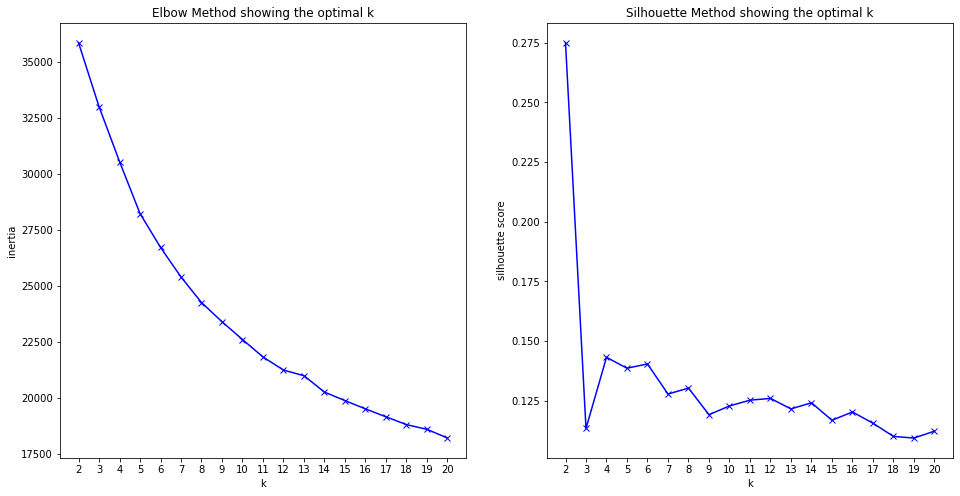

In [37]:
#plot how intertia values change with K 
fig, ax = plt.subplots(1,2,figsize=(16,8)) # ax is a np array with one row and two columns 
ax[0].plot(K, inertia, 'bx-') # "bx-" control the line stile
ax[0].set_xlabel('k') # x lable to ne K
ax[0].set_ylabel('inertia') # y label
ax[0].set_xticks(np.arange(min(K), max(K)+1, 1.0)) # ticks at the K value, jumps on 1
ax[0].set_title('Elbow Method showing the optimal k') # set title

#second plot
ax[1].plot(K, silhouette, 'bx-')
ax[1].set_xlabel('k')
ax[1].set_ylabel('silhouette score')
ax[1].set_xticks(np.arange(min(K), max(K)+1, 1.0))
ax[1].set_title('Silhouette Method showing the optimal k')

In [39]:
#funtion to load
def load(filename = "filename.pickle"): 
    try: 
        with open(filename, "rb") as file: # we open the file to read "rb"
            return pickle.load(file) #load
    except FileNotFoundError: 
        print("File not found!") 

In [40]:
kmeans_9 = load("models/kmeans_9.pickle")

kmeans_9


KMeans(n_clusters=9, verbose=1)

In [43]:
clusters = kmeans_9.predict(X_scaled_df)
#clusters
pd.Series(clusters).value_counts().sort_index()#.sum() # Number of wines in each cluster

0    229
1    196
2    548
3    517
4    208
5    290
6    468
7    691
8    544
dtype: int64

In [45]:
kmeans_9.inertia_ 

23403.278636579726

6 - place a new column with the clusters in the full numerical df

In [51]:
X["cluster_k9"] = clusters

X.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,cluster_k9
0,0.449,0.023,8,-24.423,1,0.0336,0.9030,0.018700,0.1160,0.277,90.071,171667,3
1,0.215,0.710,9,-7.285,1,0.0459,0.0143,0.000020,0.3280,0.415,160.313,337709,6
2,0.709,0.357,5,-9.289,1,0.2140,0.4780,0.000294,0.1120,0.544,75.494,129480,3
3,0.797,0.616,1,-10.229,0,0.3750,0.7620,0.000293,0.0979,0.451,103.071,339612,4
4,0.708,0.673,6,-4.163,1,0.0585,0.4990,0.000233,0.1030,0.311,136.969,197520,2


7 - concatenate num+ cluster and categorical full df

In [57]:
X_full = pd.concat([full_songs_1_cat, X],axis=1)
X_full
X_full.shape
X_full.tail()

,artist_name,song_title,identifier,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,cluster_k9
3614,Rascal Flatts,Feels Like The First Time,not_hot,0.403,0.673,1,-5.116,0,0.0325,0.076500,0.00000,0.244,0.231,77.981,267707,7
3615,Mighty Diamonds,Pass The Koutchie,not_hot,0.646,0.615,9,-12.868,1,0.0913,0.785000,0.00234,0.269,0.664,95.988,234747,2
3616,Attila,Villain,not_hot,0.318,0.879,2,-2.625,1,0.0574,0.000298,0.03010,0.145,0.443,151.481,212947,6
3617,Bohren & Der Club Of Gore,Constant Fear,not_hot,0.445,0.340,0,-7.942,0,0.0518,0.698000,0.00000,0.138,0.177,116.826,250093,3
3618,Jean Deaux,Back 2 You,not_hot,0.483,0.317,9,-15.217,0,0.0396,0.950000,0.02680,0.110,0.178,136.711,150533,3


In [60]:
X_full[X_full['cluster_k9'] == 7].sample(3)

,artist_name,song_title,identifier,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,cluster_k9
1686,Soulive,Waves,not_hot,0.640,0.624,10,-5.831,0,0.1520,0.0177,0.0000,0.2960,0.464,86.802,229427,7
2233,Nothing More,Christ Copyright,not_hot,0.649,0.989,4,-5.631,0,0.0794,0.1430,0.0165,0.0867,0.378,136.973,308000,7
119,The Knife,Silent Shout,not_hot,0.580,0.717,5,-4.097,0,0.0294,0.2860,0.0000,0.1680,0.755,170.013,289629,7


try the k=3,5,18,19

In [62]:
kmeans_3 = load("models/kmeans_3.pickle")
kmeans_3


KMeans(n_clusters=3, verbose=1)

In [63]:
clusters = kmeans_3.predict(X_scaled_df)
#clusters
pd.Series(clusters).value_counts().sort_index()#.sum() # Number of wines in each cluster

0    1689
1    1435
2     567
dtype: int64

In [65]:
X_full["cluster_k3"] = clusters
X_full.head()

,artist_name,song_title,identifier,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,cluster_k9,cluster_k3
0,Harry Styles,As It Was,hot100,0.449,0.023,8,-24.423,1,0.0336,0.9030,0.018700,0.1160,0.277,90.071,171667,3,2
1,Jack Harlow,First Class,hot100,0.215,0.710,9,-7.285,1,0.0459,0.0143,0.000020,0.3280,0.415,160.313,337709,6,1
2,Lizzo,About Damn Time,hot100,0.709,0.357,5,-9.289,1,0.2140,0.4780,0.000294,0.1120,0.544,75.494,129480,3,0
3,Glass Animals,Heat Waves,hot100,0.797,0.616,1,-10.229,0,0.3750,0.7620,0.000293,0.0979,0.451,103.071,339612,4,0
4,Latto,Big Energy,hot100,0.708,0.673,6,-4.163,1,0.0585,0.4990,0.000233,0.1030,0.311,136.969,197520,2,0


In [69]:
kmeans_5 = load("models/kmeans_5.pickle")
kmeans_5

KMeans(n_clusters=5, verbose=1)

In [70]:
clusters = kmeans_5.predict(X_scaled_df)
#clusters
pd.Series(clusters).value_counts().sort_index()#.sum() # Number of wines in each cluster

0    1431
1     331
2     936
3     743
4     250
dtype: int64

In [71]:
X_full["cluster_k5"] = clusters
X_full.head()

,artist_name,song_title,identifier,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,cluster_k9,cluster_k3,cluster_k5
0,Harry Styles,As It Was,hot100,0.449,0.023,8,-24.423,1,0.0336,0.9030,0.018700,0.1160,0.277,90.071,171667,3,2,1
1,Jack Harlow,First Class,hot100,0.215,0.710,9,-7.285,1,0.0459,0.0143,0.000020,0.3280,0.415,160.313,337709,6,1,0
2,Lizzo,About Damn Time,hot100,0.709,0.357,5,-9.289,1,0.2140,0.4780,0.000294,0.1120,0.544,75.494,129480,3,0,3
3,Glass Animals,Heat Waves,hot100,0.797,0.616,1,-10.229,0,0.3750,0.7620,0.000293,0.0979,0.451,103.071,339612,4,0,2
4,Latto,Big Energy,hot100,0.708,0.673,6,-4.163,1,0.0585,0.4990,0.000233,0.1030,0.311,136.969,197520,2,0,0


In [72]:
kmeans_18 = load("models/kmeans_18.pickle")
kmeans_18

KMeans(n_clusters=18, verbose=1)

In [73]:
clusters = kmeans_18.predict(X_scaled_df)
#clusters
pd.Series(clusters).value_counts().sort_index()#.sum() # Number of wines in each cluster

0     137
1     297
2     297
3     317
4     295
5     215
6     200
7     156
8      39
9     177
10     25
11    302
12    176
13    243
14    166
15    137
16    261
17    251
dtype: int64

In [74]:
X_full["cluster_k18"] = clusters
X_full.head()

,artist_name,song_title,identifier,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,cluster_k9,cluster_k3,cluster_k5,cluster_k18
0,Harry Styles,As It Was,hot100,0.449,0.023,8,-24.423,1,0.0336,0.9030,0.018700,0.1160,0.277,90.071,171667,3,2,1,3
1,Jack Harlow,First Class,hot100,0.215,0.710,9,-7.285,1,0.0459,0.0143,0.000020,0.3280,0.415,160.313,337709,6,1,0,4
2,Lizzo,About Damn Time,hot100,0.709,0.357,5,-9.289,1,0.2140,0.4780,0.000294,0.1120,0.544,75.494,129480,3,0,3,5
3,Glass Animals,Heat Waves,hot100,0.797,0.616,1,-10.229,0,0.3750,0.7620,0.000293,0.0979,0.451,103.071,339612,4,0,2,5
4,Latto,Big Energy,hot100,0.708,0.673,6,-4.163,1,0.0585,0.4990,0.000233,0.1030,0.311,136.969,197520,2,0,0,11


In [75]:
kmeans_19 = load("models/kmeans_19.pickle")
kmeans_19

KMeans(n_clusters=19, verbose=1)

In [76]:
clusters = kmeans_19.predict(X_scaled_df)
#clusters
pd.Series(clusters).value_counts().sort_index()#.sum() # Number of wines in each cluster

0     130
1     219
2     299
3     135
4     304
5     325
6     262
7     242
8       8
9     227
10    179
11     20
12    186
13     78
14    298
15    213
16    118
17    174
18    274
dtype: int64

In [77]:
X_full["cluster_k19"] = clusters
X_full.head()

,artist_name,song_title,identifier,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,cluster_k9,cluster_k3,cluster_k5,cluster_k18,cluster_k19
0,Harry Styles,As It Was,hot100,0.449,0.023,8,-24.423,1,0.0336,0.9030,0.018700,0.1160,0.277,90.071,171667,3,2,1,3,12
1,Jack Harlow,First Class,hot100,0.215,0.710,9,-7.285,1,0.0459,0.0143,0.000020,0.3280,0.415,160.313,337709,6,1,0,4,4
2,Lizzo,About Damn Time,hot100,0.709,0.357,5,-9.289,1,0.2140,0.4780,0.000294,0.1120,0.544,75.494,129480,3,0,3,5,7
3,Glass Animals,Heat Waves,hot100,0.797,0.616,1,-10.229,0,0.3750,0.7620,0.000293,0.0979,0.451,103.071,339612,4,0,2,5,15
4,Latto,Big Energy,hot100,0.708,0.673,6,-4.163,1,0.0585,0.4990,0.000233,0.1030,0.311,136.969,197520,2,0,0,11,7


In [79]:
X_full[X_full['cluster_k19'] == 7].sample(3)

,artist_name,song_title,identifier,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,cluster_k9,cluster_k3,cluster_k5,cluster_k18,cluster_k19
1216,Ahmad Jamal,Poinciana,not_hot,0.445,0.460,10,-9.841,1,0.1110,0.0741,0.00000,0.0571,0.738,75.859,187648,2,0,0,11,7
2822,The Damn Quails,Me and the Whiskey,not_hot,0.496,0.602,7,-5.290,1,0.0265,0.3340,0.00356,0.1470,0.398,75.519,259573,2,0,3,11,7
1247,Xavier Rudd,Gather the Hands,not_hot,0.706,0.378,7,-15.293,1,0.0379,0.9240,0.07380,0.0931,0.955,106.123,259533,3,0,3,3,7


In [82]:
X_full[X_full['cluster_k5'] == 3].sample(3)

,artist_name,song_title,identifier,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,cluster_k9,cluster_k3,cluster_k5,cluster_k18,cluster_k19
3417,Los 4,A la Larga,not_hot,0.426,0.534,7,-7.477,1,0.0295,0.1160,0.00932,0.1880,0.1330,119.306,299333,6,1,3,0,0
909,Jeremy Soule,"Sky Above, Voice Within",not_hot,0.593,0.493,3,-14.954,0,0.0320,0.7660,0.00000,0.0735,0.8090,121.749,161533,3,0,3,14,1
2865,The Strokes,Under Control,not_hot,0.481,0.490,6,-10.098,1,0.0271,0.0536,0.12300,0.0915,0.0378,152.040,287000,6,1,3,0,0
